In [1]:
import torch
from torch import nn
from torchvision import transforms
from torchvision.models import vgg16
from torch.autograd import Variable
from torch.optim import Adam

from datasets import StyleTransferDataset
from models import FastStyleTransfer, LossNetwork
from criterion import PerceptualLoss, StyleLoss
from train_utils import fit, prep_img, save_checkpoint

In [2]:
to_pil = transforms.ToPILImage()

path = 'test'
style_path = 'Starry_Night.jpg'

image_transforms = transforms.Compose([transforms.Scale(256),
                                       transforms.CenterCrop(256),
                                       transforms.ToTensor()])
train = StyleTransferDataset(path, style_path, transforms=image_transforms)

In [3]:
lossnet = LossNetwork()
lossnet.parameters()
for param in lossnet.parameters():
    param.requires_grad = False
lossnet.eval()

LossNetwork (
  (relu1_2): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
  )
  (relu2_2): Sequential (
    (0): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU (inplace)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU (inplace)
  )
  (relu3_3): Sequential (
    (0): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU (inplace)
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU (inplace)
    (5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU (inplace)
  )
  (relu4_3): Sequential (
    (0): MaxPool2d (size=(2, 2), stride

In [4]:
criterion = StyleLoss(lossnet)


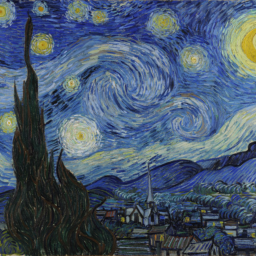

In [5]:
to_pil(train[0][1])

In [6]:
criterion(Variable(train[0][1].unsqueeze(0)), Variable(train[0][0].unsqueeze(0)))

Variable containing:
1.00000e-04 *
  1.6836
[torch.FloatTensor of size 1]

4


Variable containing:
1.00000e-05 *
  4.2089
[torch.FloatTensor of size 1]

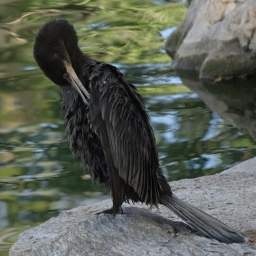

In [7]:
to_pil(train[0][0])

In [8]:
lossnet(Variable(train[0][1].unsqueeze(0)))

{'relu1_2': Variable containing:
 ( 0 , 0 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.2789  0.5668  0.0000  ...   0.6615  0.0000  0.0000
   0.2507  0.9023  0.0000  ...   0.4109  0.0000  0.1951
            ...             ⋱             ...          
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0675
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0989  0.0000  ...   0.4976  0.0000  0.2146
 
 ( 0 , 1 ,.,.) = 
   0.3351  0.0892  0.0000  ...   0.2160  0.6058  0.0000
   0.6249  0.1218  0.0000  ...   0.0000  0.7365  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.3218  0.0000
            ...             ⋱             ...          
   0.1420  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   1.1901  0.0000  0.0000  ...   0.6267  1.1130  0.0000
   0.7242  0.0000  0.0000  ...   0.5857  0.9751  0.0000
 
 ( 0 , 2 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.2541  0.3275  0.0000
   0.8377  0.